# EXERCISES: Support vector machines & Decision Trees

## Exercise 1:

In this exercise, you will apply support vector machine (SVM) methods to predict whether a car has high or low fuel efficiency using the *Auto* dataset.
**Hint:** This dataset is available in the seaborn library under the name mpg.

a) Load the mpg dataset and if the dataset contains NaNs or missing values, apply a data imputation strategy (remove observations, replace by variable mean, multivariate imputation, etc).

In [20]:
import seaborn as sns

# Step 1: Load dataset
mpg = sns.load_dataset("mpg")

# Possible imputation strategy
import numpy as np
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
mpg.displacement = imp.fit_transform(mpg["displacement"].values.reshape(-1,1))
mpg.cylinders = imp.fit_transform(mpg["cylinders"].values.reshape(-1,1))
mpg.horsepower = imp.fit_transform(mpg["horsepower"].values.reshape(-1,1))
mpg.weight = imp.fit_transform(mpg["weight"].values.reshape(-1,1))
mpg.acceleration = imp.fit_transform(mpg["acceleration"].values.reshape(-1,1))
mpg.model_year = imp.fit_transform(mpg["model_year"].values.reshape(-1,1))
mpg.mpg = imp.fit_transform(mpg["mpg"].values.reshape(-1,1))

print(mpg.head())


    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0        8.0         307.0       130.0  3504.0          12.0   
1  15.0        8.0         350.0       165.0  3693.0          11.5   
2  18.0        8.0         318.0       150.0  3436.0          11.0   
3  16.0        8.0         304.0       150.0  3433.0          12.0   
4  17.0        8.0         302.0       140.0  3449.0          10.5   

   model_year origin                       name  
0        70.0    usa  chevrolet chevelle malibu  
1        70.0    usa          buick skylark 320  
2        70.0    usa         plymouth satellite  
3        70.0    usa              amc rebel sst  
4        70.0    usa                ford torino  


b) Create a binary response variable: assign a value of 1 to cars with gas mileage (mpg) above the median, and 0 to those below the median.

In [22]:
mpg["mpg_above_median"] = mpg["mpg"] > mpg["mpg"].median()
print(mpg.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0        8.0         307.0       130.0  3504.0          12.0   
1  15.0        8.0         350.0       165.0  3693.0          11.5   
2  18.0        8.0         318.0       150.0  3436.0          11.0   
3  16.0        8.0         304.0       150.0  3433.0          12.0   
4  17.0        8.0         302.0       140.0  3449.0          10.5   

   model_year origin                       name  mpg_above_median  
0        70.0    usa  chevrolet chevelle malibu             False  
1        70.0    usa          buick skylark 320             False  
2        70.0    usa         plymouth satellite             False  
3        70.0    usa              amc rebel sst             False  
4        70.0    usa                ford torino             False  


c) Split the dataset into a training set and a test set.


In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(mpg[["cylinders","displacement","horsepower","weight","acceleration","model_year"]], mpg["mpg_above_median"], train_size=0.7, random_state=46)

d)  Fit a support vector classifier to the data using various values of the cost parameter **C**. Report the cross-validation error for each value and discuss your findings. Be sure to exclude the mpg variable and other categorical variables from the predictors when fitting the model.

In [32]:
from sklearn.svm import SVC

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf_1 = make_pipeline(StandardScaler(), SVC(C=1.0, kernel="linear"))
clf_2 = make_pipeline(StandardScaler(), SVC(C=2.2, kernel="linear"))
clf_3 = make_pipeline(StandardScaler(), SVC(C=0.3, kernel="linear"))


# For k-fold cross validation, only the training data is used (https://scikit-learn.org/stable/modules/cross_validation.html)
from sklearn.model_selection import cross_validate

scoring = ["precision_macro", "recall_macro"] # define scroing strategies

# Cross validate (this function separates the dataset into test/train data and performs k-fold cross-validation)
    # SVC model 1
scores = cross_validate(clf_1, x_train, y_train, cv=20, scoring=scoring)

prec_mean = scores["test_precision_macro"].mean()
rec_mean  = scores["test_recall_macro"].mean()

print(f"\n Precision Macro mean: {prec_mean}")
print(f"\n Recall Macro mean: {rec_mean}")

    # SVC model 2
scores = cross_validate(clf_2, x_train, y_train, cv=20, scoring=scoring)

prec_mean = scores["test_precision_macro"].mean()
rec_mean  = scores["test_recall_macro"].mean()

print(f"\n Precision Macro mean: {prec_mean}")
print(f"\n Recall Macro mean: {rec_mean}")

    # SVC model 3
scores = cross_validate(clf_3, x_train, y_train, cv=20, scoring=scoring)

prec_mean = scores["test_precision_macro"].mean()
rec_mean  = scores["test_recall_macro"].mean()

print(f"\n Precision Macro mean: {prec_mean}")
print(f"\n Recall Macro mean: {rec_mean}")


 Precision Macro mean: 0.9092757936507935

 Recall Macro mean: 0.9038690476190474

 Precision Macro mean: 0.9064980158730158

 Recall Macro mean: 0.8997023809523806

 Precision Macro mean: 0.9126488095238093

 Recall Macro mean: 0.9038690476190474


e) Repeat part (d) using SVMs with radial and polynomial kernels. Experiment with different values of **gamma** and **degree** and **C**. Comment on your results.

In [43]:
from sklearn.svm import SVC

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Polynomial kernel SVC
print("POLYNOMIAL KERNEL --------------")
clf_1 = make_pipeline(StandardScaler(), SVC(C=1.0, kernel="poly", degree=5, gamma="auto"))
clf_2 = make_pipeline(StandardScaler(), SVC(C=2.2, kernel="poly", degree=5, gamma="auto"))
clf_3 = make_pipeline(StandardScaler(), SVC(C=0.3, kernel="poly", degree=5, gamma="auto"))


# For k-fold cross validation, only the training data is used (https://scikit-learn.org/stable/modules/cross_validation.html)
from sklearn.model_selection import cross_validate

scoring = ["precision_macro", "recall_macro"] # define scroing strategies

# Cross validate (this function separates the dataset into test/train data and performs k-fold cross-validation)
    # SVC model 1
scores = cross_validate(clf_1, x_train, y_train, cv=20, scoring=scoring)

prec_mean = scores["test_precision_macro"].mean()
rec_mean  = scores["test_recall_macro"].mean()

print(f"\n Precision Macro mean: {prec_mean}")
print(f"\n Recall Macro mean: {rec_mean}")

    # SVC model 2
scores = cross_validate(clf_2, x_train, y_train, cv=20, scoring=scoring)

prec_mean = scores["test_precision_macro"].mean()
rec_mean  = scores["test_recall_macro"].mean()

print(f"\n Precision Macro mean: {prec_mean}")
print(f"\n Recall Macro mean: {rec_mean}")

    # SVC model 3
scores = cross_validate(clf_3, x_train, y_train, cv=20, scoring=scoring)

prec_mean = scores["test_precision_macro"].mean()
rec_mean  = scores["test_recall_macro"].mean()

print(f"\n Precision Macro mean: {prec_mean}")
print(f"\n Recall Macro mean: {rec_mean}")

# Radial kernel SVC
print("\nRADIAL KERNEL --------------")
clf_1 = make_pipeline(StandardScaler(), SVC(C=1.0, kernel="rbf", degree=5, gamma="auto"))
clf_2 = make_pipeline(StandardScaler(), SVC(C=2.2, kernel="rbf", degree=5, gamma="auto"))
clf_3 = make_pipeline(StandardScaler(), SVC(C=0.3, kernel="rbf", degree=5, gamma="auto"))


# For k-fold cross validation, only the training data is used (https://scikit-learn.org/stable/modules/cross_validation.html)
from sklearn.model_selection import cross_validate

scoring = ["precision_macro", "recall_macro"] # define scroing strategies

# Cross validate (this function separates the dataset into test/train data and performs k-fold cross-validation)
    # SVC model 1
scores = cross_validate(clf_1, x_train, y_train, cv=20, scoring=scoring)

prec_mean = scores["test_precision_macro"].mean()
rec_mean  = scores["test_recall_macro"].mean()

print(f"\n Precision Macro mean: {prec_mean}")
print(f"\n Recall Macro mean: {rec_mean}")

    # SVC model 2
scores = cross_validate(clf_2, x_train, y_train, cv=20, scoring=scoring)

prec_mean = scores["test_precision_macro"].mean()
rec_mean  = scores["test_recall_macro"].mean()

print(f"\n Precision Macro mean: {prec_mean}")
print(f"\n Recall Macro mean: {rec_mean}")

    # SVC model 3
scores = cross_validate(clf_3, x_train, y_train, cv=20, scoring=scoring)

prec_mean = scores["test_precision_macro"].mean()
rec_mean  = scores["test_recall_macro"].mean()

print(f"\n Precision Macro mean: {prec_mean}")
print(f"\n Recall Macro mean: {rec_mean}")

POLYNOMIAL KERNEL --------------

 Precision Macro mean: 0.9175955988455989

 Recall Macro mean: 0.9032738095238095

 Precision Macro mean: 0.9000856782106782

 Recall Macro mean: 0.88125

 Precision Macro mean: 0.8280429292929293

 Recall Macro mean: 0.7544642857142857

RADIAL KERNEL --------------

 Precision Macro mean: 0.9218253968253967

 Recall Macro mean: 0.9150297619047618

 Precision Macro mean: 0.9371527777777775

 Recall Macro mean: 0.9324404761904761

 Precision Macro mean: 0.9149801587301587

 Recall Macro mean: 0.9043154761904763


f) Generate visualizations to support your conclusions from parts (d) and (e).

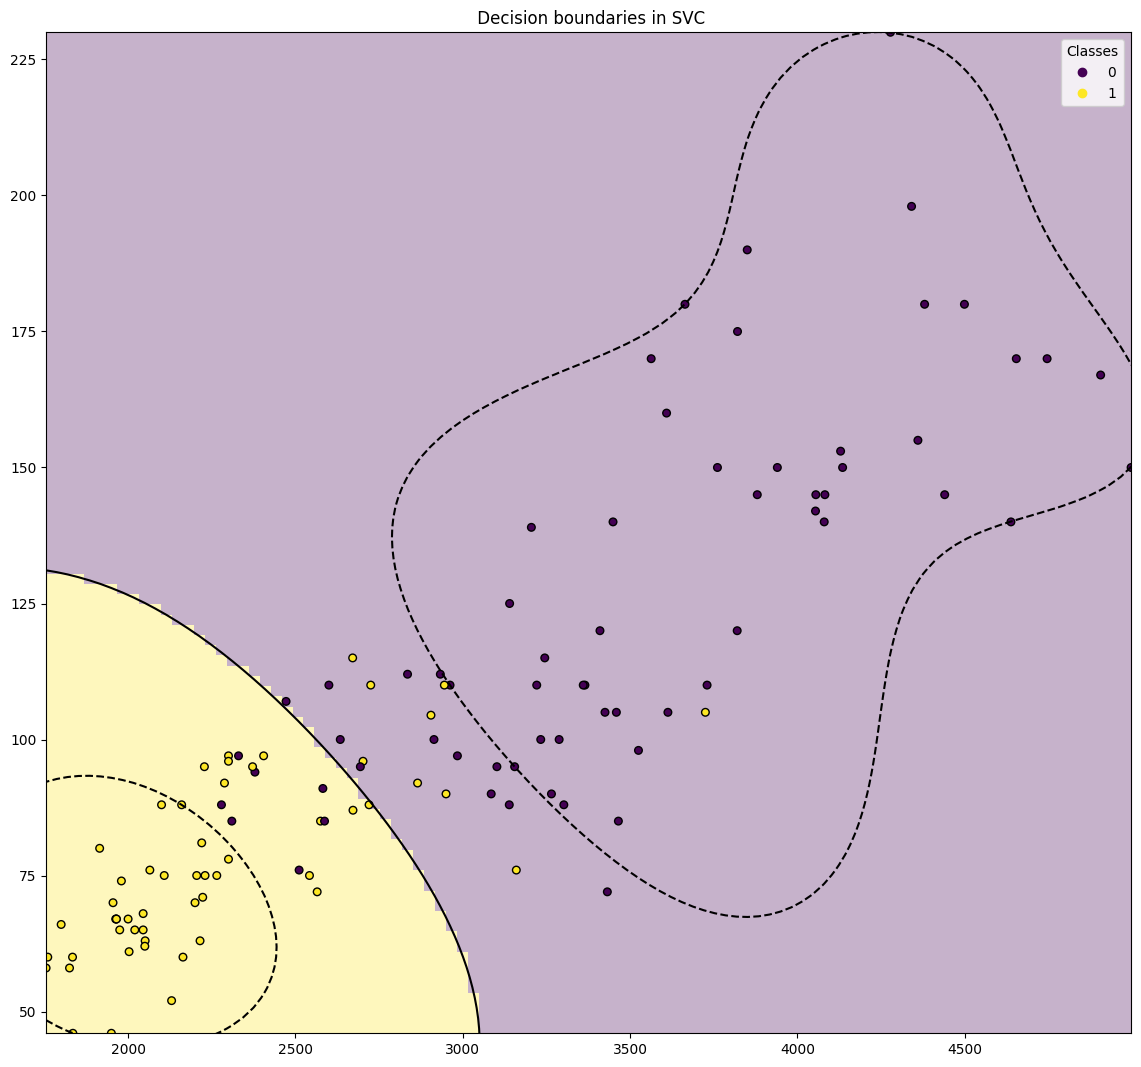

In [96]:
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt

def plot_training_data_with_decision_boundary(
    clf, X, y, ax=None, support_vectors=False
):
    
    clf.fit(X, y)
    
    # Settings for plotting
    if ax is None:
        _, ax = plt.subplots(figsize=(14, 13))
    x_min, x_max, y_min, y_max = min(X[:,0]), max(X[:,0]), min(X[:,1]), max(X[:,1])
    ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

    # Plot decision boundary and margins
    common_params = {"estimator": clf, "X": X, "ax": ax}
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="predict",
        plot_method="pcolormesh",
        alpha=0.3,
    )
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="decision_function",
        plot_method="contour",
        levels=[-1, 0, 1],
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
    )


    # NOTE: due to the StandardScaler transformation, support vectors are not in the same scale as data (cannot be seen in plot)
    if support_vectors:
        # Plot bigger circles around samples that serve as support vectors
        ax.scatter(
            clf.named_steps["svc"].support_vectors_[:, 0],
            clf.named_steps["svc"].support_vectors_[:, 1],
            s=150,
            facecolors="none",
            edgecolors="k",
        )

    # Plot samples by color and add legend
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors="k")
    ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
    ax.set_title(f" Decision boundaries in SVC")
    plt.show()

clf = make_pipeline(StandardScaler(), SVC(C=1.0, kernel="rbf", gamma="auto"))

plot_training_data_with_decision_boundary(clf,x_test[["weight","horsepower"]].to_numpy(),y_test.to_numpy())

## Exercise 2:
In this exercise, you will use decision tree models to predict sales performance using the Carseats dataset from Kaggle. The goal is to build interpretable models that can help understand the key drivers of high and low sales in car seat stores.

a) Load the carseats dataset and if the dataset contains NaNs or missing values, apply a data imputation strategy (remove observations, replace by variable mean, multivariate imputation, etc).

b) Split the dataset into a training set and a test set.

c) Fit a regression tree to the training data. Plot the tree and interpret the results. What is the test mean squared error (MSE)?

d) Use cross-validation to determine the optimal tree complexity. Does pruning the tree reduce the test MSE?

e) Apply the bagging method to the dataset. What is the resulting test MSE?

d)  Use random forests to model the data. Report the test MSE and the most influential features based on feature_importances_. Discuss how varying m, the number of features considered at each split, affects the model's error rate.